<a href="https://colab.research.google.com/github/Mercury1565/Linear-Regression-Exercises/blob/main/Linear_Regression_Model_for_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

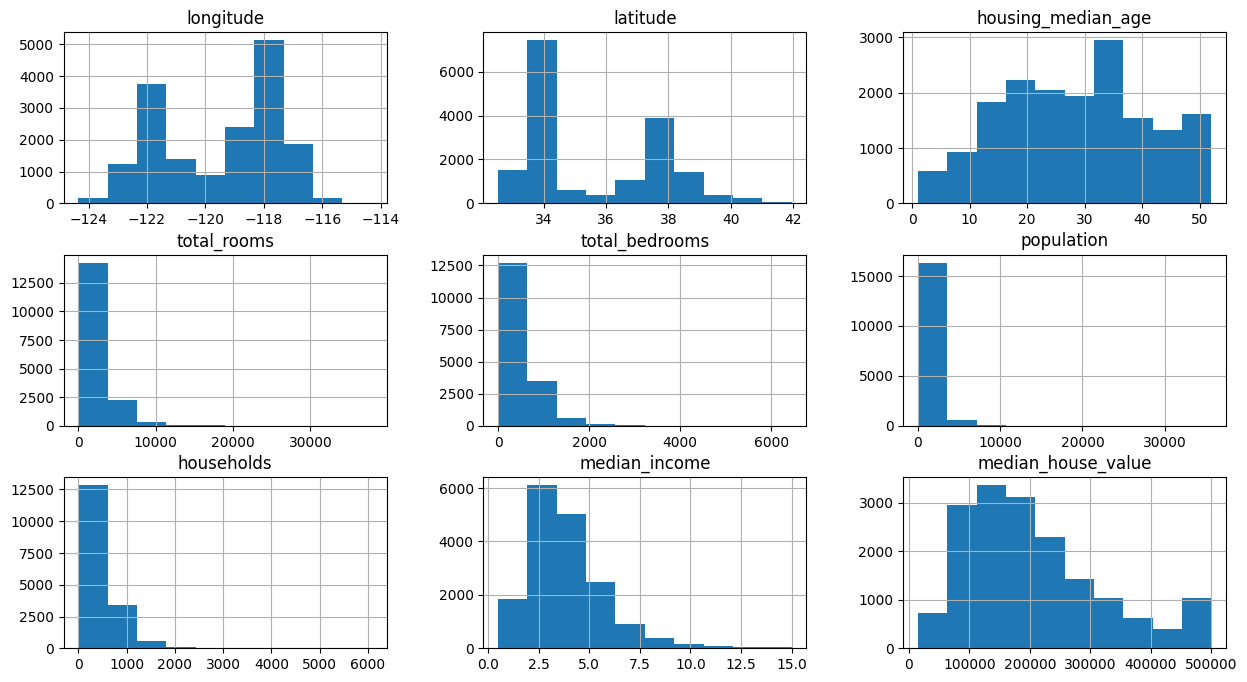

In [ ]:
# We can see the freqency distribution of each instance of the featurestrain_
train_data.hist(figsize = (15 , 8))

You can see from these frequency distribution graphs that some of the parameters are skewed, right skewed to be specific. This will affect the result as there may be outlining instances that will disproportinately affect the linear regression.

I will therefore apply logarthimic transformation to evenly distribut those parameters that are skewed

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)

# +1 on each log transformation to avoid log(0) -> -inf overshoot


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

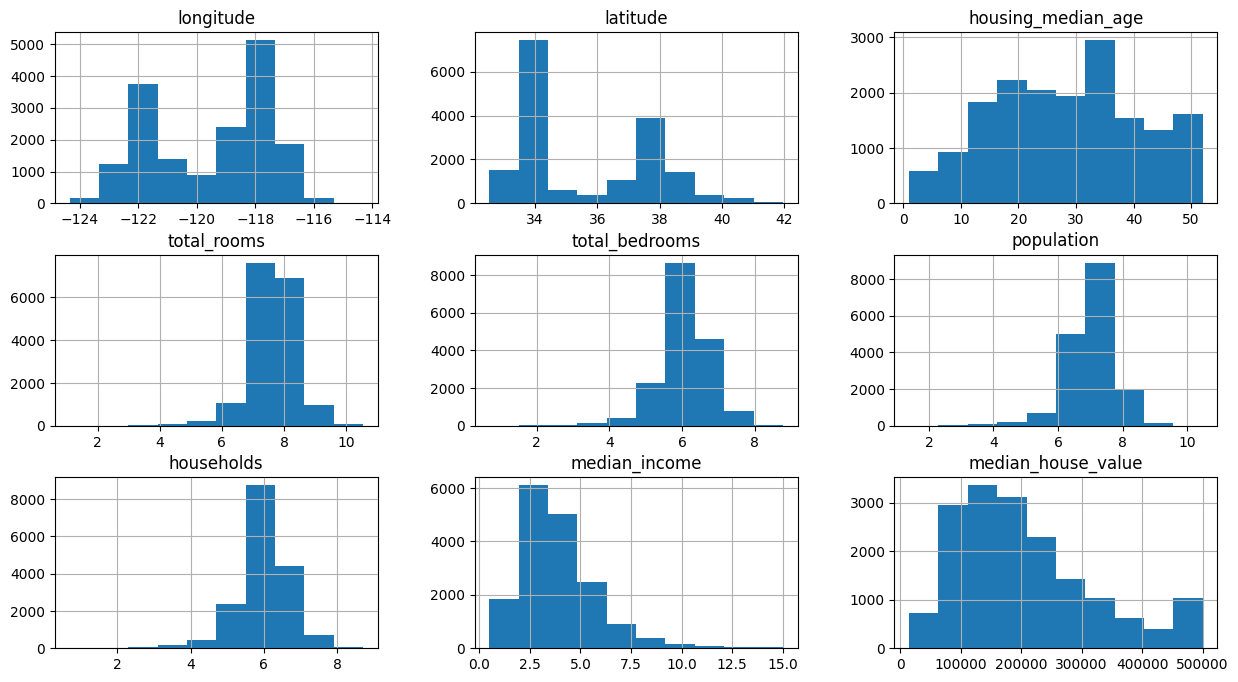

In [ ]:
# Now we can visiualize the effect of the logarthimc transformation
train_data.hist(figsize = (15 , 8))

<Axes: >

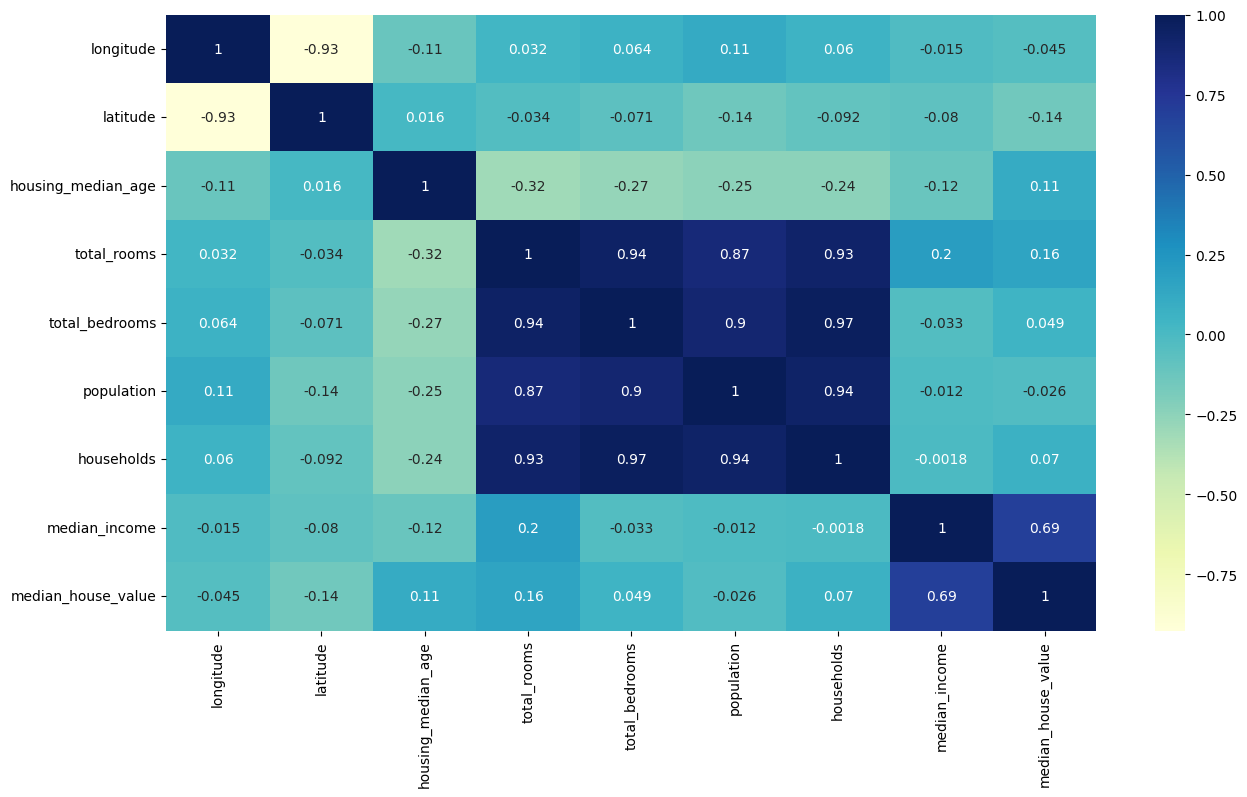

In [ ]:
# We can also visualize how the features correlate with eachother

plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr() , annot = True , cmap = 'YlGnBu')

From this observation, one can understand that it is the 'median_income' parameter that has the highest income on the house price.

This keep observation early on will later come in handy.

<Axes: xlabel='latitude', ylabel='longitude'>

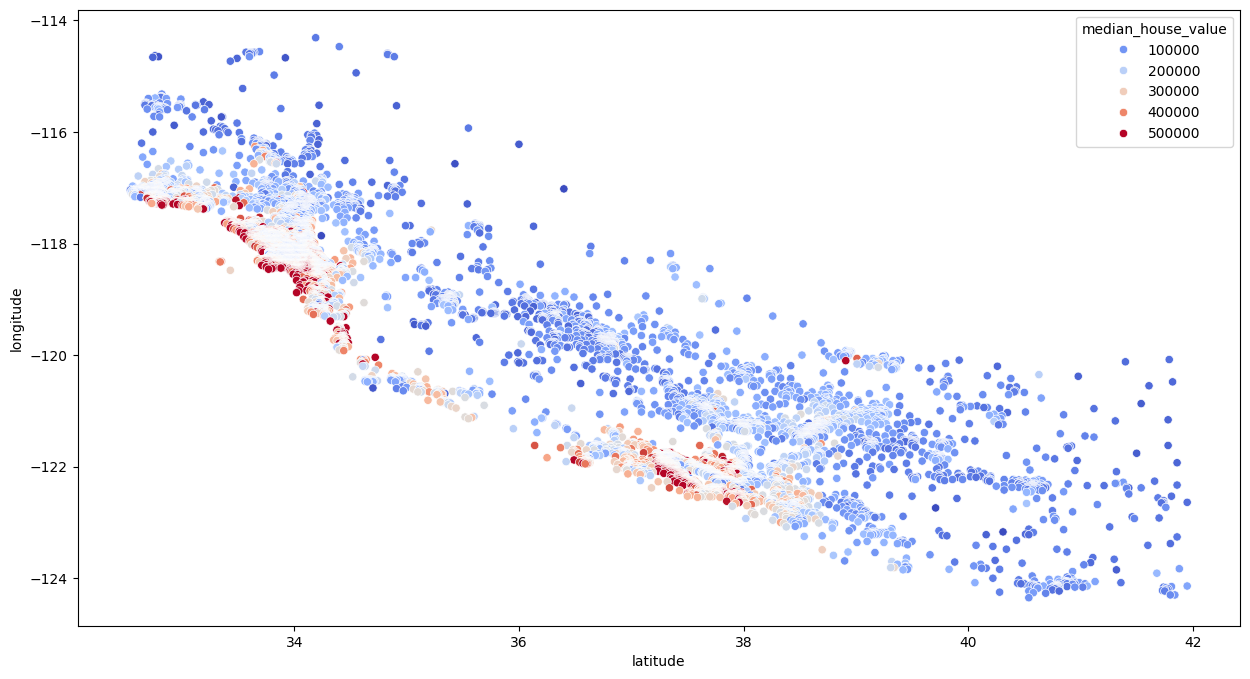

In [ ]:
plt.figure(figsize = (15 , 8))
sns.scatterplot(x = "latitude" , y = "longitude" , data = train_data , hue = "median_house_value" , palette = "coolwarm")

In [ ]:
# Split training data into x and y

x_train = train_data.drop(['median_house_value'] , axis = 1)
y_train = train_data['median_house_value']

In [ ]:
# Fit our training data into a linear regression model

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x_train , y_train)

LinearRegression()

In [ ]:
# Now import your testing data
test_data = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [ ]:
# Even out the distribution for the test data as well

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)

In [ ]:
# FIRST TRIAL

x_test = test_data.drop(['median_house_value'] , axis = 1)
y_test = test_data['median_house_value']

reg.score(x_test , y_test)

0.6416191940964577

In [ ]:
# Add additional features to improve the score

train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['room_ratio'] = train_data['total_rooms'] / train_data['households']

<Axes: >

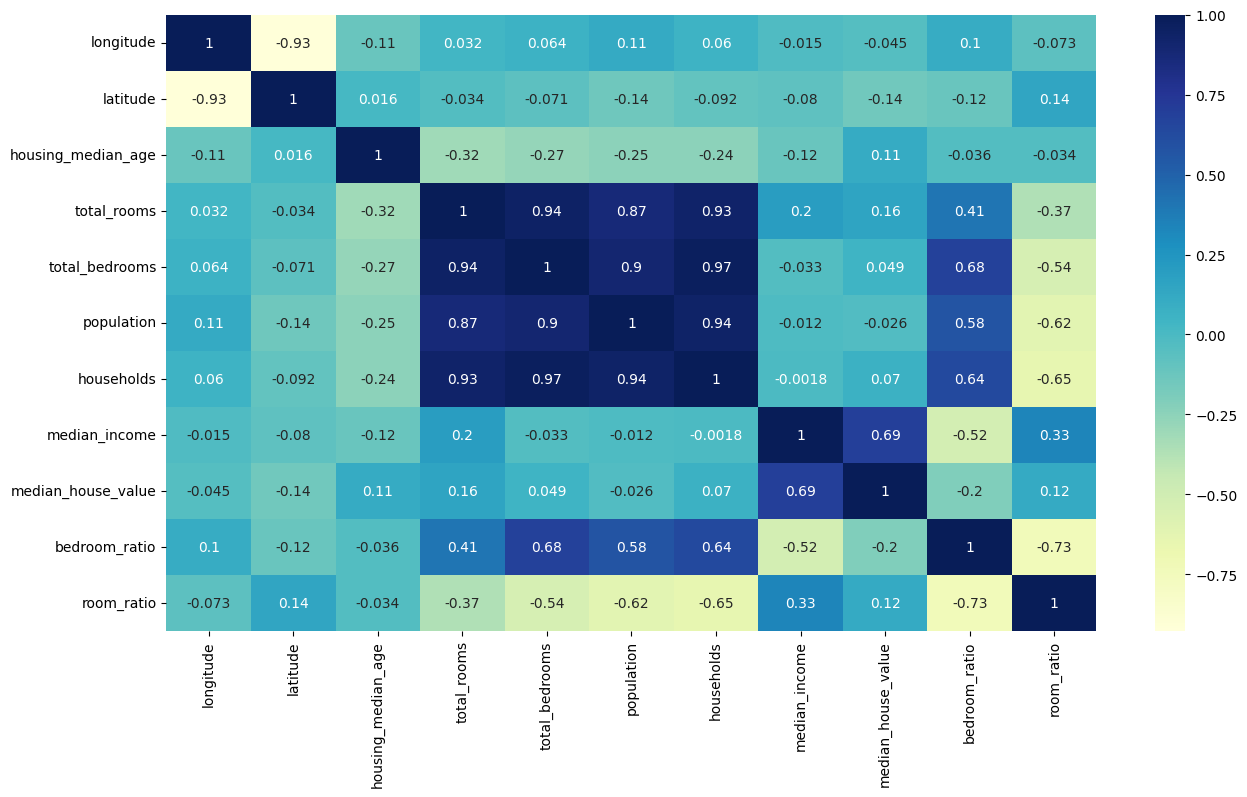

In [ ]:
# Visualize the correlation of the newely added features to the house value

plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr() , annot = True , cmap = 'YlGnBu')

In [ ]:
# split testing data into x and y

x_train = train_data.drop(['median_house_value'] , axis = 1)
y_train = train_data['median_house_value']

In [ ]:
# Fit the model with the improved training data again

reg.fit(x_train , y_train)

LinearRegression()

In [ ]:
# Add the added features to the testing data as well

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['room_ratio'] = test_data['total_rooms'] / test_data['households']

x_test = test_data.drop(['median_house_value'] , axis = 1)
y_test = test_data['median_house_value']

In [ ]:
reg.score(x_test , y_test)

0.6418764639764118

- **RESULT = 0.641876**   Not bad but also not so good.

- A key takeaway from this exercise is that the training data and testing data should correspond, meaning whatever you do with the training data to make your model better, you must also do to the testing data before testing the model

- Another takeaway is that adding new features (Feature Engineering) that could be relevant will improve your result.

- Also notice that the data used is not normalized to a similar scale quite yet. I would expect that normalization would have a significant impact on the result

In [ ]:
# Incorporate the standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

'''
StandardScaler subtracts the mean from each feature and divide them with
their standard deviation. By doing so, one can bring all the instances
in a unit distance from the mean, hence scaling the data
'''

'\nStandardScaler subtracts the mean from each feature and divide them with \ntheir standard deviation. By doing so, one can bring all the instances\nin a unit distance from the mean, hence scaling the data\n'

In [ ]:
# Apply the scaler on the 'X' values of both the training and testing data

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
# Fit the model with the scaled data

reg.fit(x_train_scaled , y_train)

LinearRegression()

In [ ]:
reg.score(x_test_scaled , y_test)

0.6407777737730691

Interestingly, the normal scaling turned out to make the result even worse.

But I expect in a more larger model, scaling the data would improve results as comapred with a model trained with an unscaled data. The former would be more resilient to the effect of outlying instances.